In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import scipy.stats as stats

In [2]:
%matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)

In [3]:
df_national_official = pd.read_csv('data/national_cdc_pandas_df.csv', index_col=0)

In [4]:
df_states_official = pd.read_csv('data/states_cdc_pandas_df.csv', index_col=0)

In [5]:
#Create List of Weeks 1-11
week_labels = list(df_national_official['Week'].unique())
week_labels.sort()
weeks_to_9 = week_labels[:9]
weeks_to_10 = week_labels[:10]
weeks_to_11 = week_labels[:11]
weeks_to_12 = week_labels[:12]

In [6]:
#Create List of Yrs 2014-2020
years = list(df_national_official['Calendar_year'].unique())
years.sort()
years = years[1:]

#### Create Lists of both Sample Statistics: Avg Death Rate & Avg PI % of all Deaths. Want to compare 2020 to 2019 and 2020 to 2014-2019

In [7]:
dr_2020 = []
dr_2019 = []
dr_2014_19 = []

dr_2020_v2 = []
dr_2019_v2 = []
dr_2014_19_v2 = []

dr_2020_v3 = []
dr_2019_v3 = []
dr_2014_19_v3 = []

pi_2020 = []
pi_2019 = []
pi_2014_19 = []

#Adding in Week 12, despite low percent completeness to get Pneumonia & Influenza data since it is % of Dead
pi_2020_v2 = []
pi_2019_v2 = []
pi_2014_19_v2 = []

In [8]:
for week in weeks_to_11:
    for year in years:
        mask = (df_national_official['Week'] == week) & \
                (df_national_official['Calendar_year'] == year)
        df = df_national_official[mask]
        
        if year == 2020:
            dr_2020.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            pi_2020.append(round(df['Percent_p_i'].iloc[0],4))
        elif year == 2019:
            dr_2019.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            pi_2019.append(round(df['Percent_p_i'].iloc[0],4))
            dr_2014_19.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            pi_2014_19.append(round(df['Percent_p_i'].iloc[0],4))
        else:
            dr_2014_19.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            pi_2014_19.append(round(df['Percent_p_i'].iloc[0],4))

In [9]:
for week in weeks_to_12:
    for year in years:
        mask = (df_national_official['Week'] == week) & \
                (df_national_official['Calendar_year'] == year)
        df = df_national_official[mask]
        
        if year == 2020:
            pi_2020_v2.append(round(df['Percent_p_i'].iloc[0],4))
        elif year == 2019:
            pi_2019_v2.append(round(df['Percent_p_i'].iloc[0],4))
            pi_2014_19_v2.append(round(df['Percent_p_i'].iloc[0],4))
        else:
            pi_2014_19_v2.append(round(df['Percent_p_i'].iloc[0],4))

In [10]:
for week in weeks_to_10:
    for year in years:
        mask = (df_national_official['Week'] == week) & \
                (df_national_official['Calendar_year'] == year)
        df = df_national_official[mask]
        
        if year == 2020:
            dr_2020_v2.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            
        elif year == 2019:
            dr_2019_v2.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            
            dr_2014_19_v2.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            
        else:
            dr_2014_19_v2.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            

In [11]:
for week in weeks_to_9:
    for year in years:
        mask = (df_national_official['Week'] == week) & \
                (df_national_official['Calendar_year'] == year)
        df = df_national_official[mask]
        
        if year == 2020:
            dr_2020_v3.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            
        elif year == 2019:
            dr_2019_v3.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            
            dr_2014_19_v3.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            
        else:
            dr_2014_19_v3.append(round(df['Deaths_per_hund_thou'].iloc[0],2))
            

### Before applying statistical tests, plot box plots to get early idea of what direction you want to test

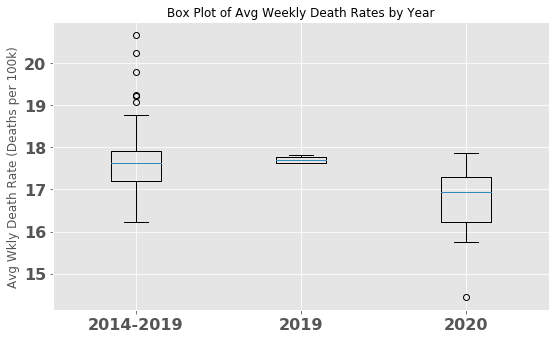

In [12]:
fig, ax = plt.subplots(1, figsize=(8, 5))
ax.boxplot([dr_2014_19, dr_2019, dr_2020])
ax.set_xticks([1,2,3])
ax.set_xticklabels(['2014-2019', '2019', '2020'])

ax.set_title('Box Plot of Avg Weekly Death Rates by Year',fontsize = 12)
ax.set_ylabel("Avg Wkly Death Rate (Deaths per 100k)", fontsize = 12)
plt.tight_layout()

# ax.set_title(f'State: {state}. Weeks of Data: {len(state_dict[state])}',fontsize = 10)

# Look into how to highlight outliers
# Look into how to share titles across multiple plots

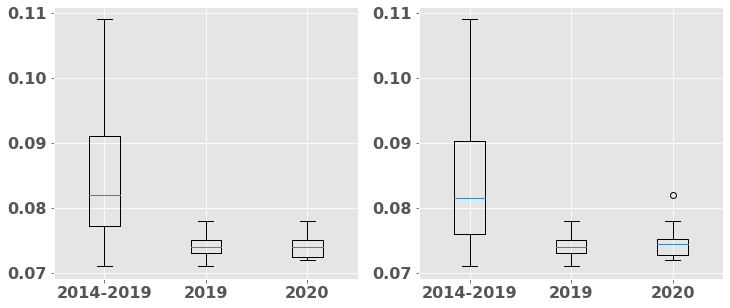

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

for idx, ax in enumerate(axs.flatten()):
    if idx == 0:
        ax.boxplot([pi_2014_19, pi_2019, pi_2020])
        ax.set_xticks([1,2,3])
        ax.set_xticklabels(['2014-2019', '2019', '2020'])
#         ax.set_title('Box Plot of Avg Weekly % of Deaths caused by Pneumonia & Influenza',fontsize = 12)
    elif idx == 1:
        ax.boxplot([pi_2014_19_v2, pi_2019_v2, pi_2020_v2])
        ax.set_xticks([1,2,3])
        ax.set_xticklabels(['2014-2019', '2019', '2020']) 
#         axs.set_title('Box Plot of Avg Weekly % of Deaths caused by Pneumonia & Influenza Incl Week 12',fontsize = 12)


### Statistical Tests #1: National Death Rates.  Sample Sizes are 11. Sample Statistic is Mean Weekly Death Rate. Sample size is not larger than 30 and samples are not identically calculated (population changes) nor independent (seasonality). Thus I cannot infer CLT and assum Sample Statistic follows normal Dist.  Therefore, I can do non-parametric tests.  I will still do T-Test as well to just check and potentally bootstrapping

> Null Hypothesis 1: 2019's Death Rate is equaliy likely to be higher than 2020's as the other way around. I.e.
    $P(\text{Die in a week in 2019 > Die in a week in 2020}) = 0.50 $

> Null Hypothesis 2: 2014's Death Rate is equaliy likely to be higher than 2020's as the other way around. I.e.
    $P(\text{Die in a week in 2014-2019 > Die in a week in 2020}) = 0.50 $

> Chosen Alpha: 0.01

### Mann-Whitney Signed Rank Test

In [14]:
stats.mannwhitneyu(dr_2019, dr_2020, alternative="greater")


MannwhitneyuResult(statistic=99.0, pvalue=0.006243169566795771)

In [15]:
stats.mannwhitneyu(dr_2014_19, dr_2020, alternative="greater")


MannwhitneyuResult(statistic=562.0, pvalue=0.0019271208503696576)

In [16]:
#test excluding Week 11 - outlier
stats.mannwhitneyu(dr_2019_v2, dr_2020_v2, alternative="greater")


MannwhitneyuResult(statistic=80.0, pvalue=0.012790648078739504)

In [17]:
#test excluding Week 10 and 11
stats.mannwhitneyu(dr_2019_v3, dr_2020_v3, alternative="greater")


MannwhitneyuResult(statistic=63.0, pvalue=0.025908235684109524)

In [18]:
#test excluding Week 11 - outlier
stats.mannwhitneyu(dr_2014_19_v2, dr_2020_v2, alternative="greater")


MannwhitneyuResult(statistic=463.0, pvalue=0.003189596704303478)

In [19]:
#test excluding Week 10 and 11
stats.mannwhitneyu(dr_2014_19_v3, dr_2014_19_v3, alternative="greater")


MannwhitneyuResult(statistic=1458.0, pvalue=0.5012259146992846)

## Welsh T-Test to just see

In [20]:
stats.ttest_ind(dr_2019,dr_2020, equal_var = False)

Ttest_indResult(statistic=3.439862586764269, pvalue=0.006220009268575825)

In [21]:
stats.ttest_ind(dr_2014_19,dr_2020, equal_var = False)

Ttest_indResult(statistic=3.2065012402818165, pvalue=0.007155930036471277)

In [22]:
#test excluding Week 11 - outlier
stats.ttest_ind(dr_2019_v2,dr_2020_v2, equal_var = False)

Ttest_indResult(statistic=3.6334696212141404, pvalue=0.0052423817047300425)

In [23]:
#test excluding Week 11 - outlier
stats.ttest_ind(dr_2014_19_v2,dr_2020_v2, equal_var = False)

Ttest_indResult(statistic=3.435956023077149, pvalue=0.004109491206912265)

### Statistical Tests #2: % of Death due to Influenza & Pneumonia.  Sample Sizes are 11. Sample Statistic is Avg % of Deaths due to Influenza & Pneumonia. Sample size is not larger than 30. One could potentially argue samplesis   identically distributed, but not independent (seasonality). Thus I cannot infer CLT and assum Sample Statistic follows normal Dist.  Therefore, I can do non-parametric tests.  I will still do T-Test as well to just check and potentally bootstrapping

> Null Hypothesis 1: 2020's I&P % of Deaths is equaliy likely to be higher than 2019's as the other way around. I.e.
    $P(\text{Pct Deaths due to Influenza+Pneum in 2020 > Pct Deaths due to Influenza+Pneum in 2019}) = 0.50 $

> Null Hypothesis 1: 2020's I&P % of Deaths is equaliy likely to be higher than 2014-19's as the other way around. I.e.
    $P(\text{Pct Deaths due to Influenza+Pneum in 2020 > Pct Deaths due to Influenza+Pneum in 2014-19}) = 0.50 $


> Chosen Alpha: 0.01

### Mann-Whitney Signed Rank Test

In [24]:
stats.mannwhitneyu(pi_2020, pi_2019, alternative="two-sided")

MannwhitneyuResult(statistic=63.5, pvalue=0.8677016699851804)

In [25]:
stats.mannwhitneyu(pi_2020, pi_2014_19, alternative="two-sided")

MannwhitneyuResult(statistic=91.5, pvalue=7.782386690809188e-05)

In [26]:
#Including Week 12
stats.mannwhitneyu(pi_2020_v2, pi_2019_v2, alternative="two-sided")

MannwhitneyuResult(statistic=79.0, pvalue=0.7033658936618321)

In [27]:
#Including Week 12
stats.mannwhitneyu(pi_2020_v2, pi_2014_19_v2, alternative="two-sided")

MannwhitneyuResult(statistic=145.0, pvalue=0.00024372604605772902)

## Welsh T-Test to just see


In [28]:
stats.ttest_ind(pi_2020,pi_2019, equal_var = False)

Ttest_indResult(statistic=0.10758287072797784, pvalue=0.9154076400969492)

In [29]:
stats.ttest_ind(pi_2020,pi_2014_19, equal_var = False)

Ttest_indResult(statistic=-7.709665439198676, pvalue=4.550662709961921e-11)

In [30]:
stats.ttest_ind(pi_2020_v2,pi_2019_v2, equal_var = False)

Ttest_indResult(statistic=0.6584052983883292, pvalue=0.5179603434165234)

In [31]:
stats.ttest_ind(pi_2020_v2,pi_2014_19_v2, equal_var = False)

Ttest_indResult(statistic=-6.403700020419153, pvalue=2.3757015484990545e-08)